In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Existing Synthetic Network</h1>
<h2 style="text-align: center;">LINK as relational model</h2>

<h2>Dependencies</h2>

In [12]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>Parameters</h2>

In [107]:
kind = "BAH"                       # network generative model type
sampling = "nodes"                 # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.05                       # fraction of nodes to sample 
epoch = 1                          # epoch (iteration number #)
LC = "prior"                       # local model
RC = "LINK"                        # relational model
CI = "relaxationlink"              # inference
N = 2000                            # Number of nodes: 500, 2000
m = 4                              # minimum degree: 4, 20
B = 0.1                            # minority fraction: 0.1, 0.3, 0.5
H = 0.9                            # Homophily: 0.0, 0.1, 0.2, ..., 1.0
epoch = 2                          # x out of 5 
DATAPATH = "../data/"              # networkx graph files path
OUTPUT = "../results-individual"   # directory to store results

#BAH-N2000-m4-B0.1-H0.9-i2-x5-h0.9-k8.0-km5.8-kM8.2

<h2>1. Network</h2>

In [108]:
net = Network()
net.load(io.get_random_datafn(DATAPATH,kind,N,m,B,H))
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'kind': None, 'group': ['M', 'm'], 'x': '5', 'N': '2000', 'b': 0.1, 'h': 0.9, 'm': '4', 'attributes': ['color'], 'H': None, 'B': '0.1', 'name': 'homophilic_barabasi_albert', 'fullname': 'BAH-N2000-m4-B0.1-H0.9-i1-x5-h0.9-k8.0-km5.9-kM8.2', 'Hmm': None, 'kM': 8.213888888888889, 'e': 7984, 'class': 'color', 'HMM': None, 'km': 5.915, 'i': '1', 'k': 7.984, 'n': 2000, 'density': 0.00399399699849925, 'min_degree': 4, 'labels': ['blue', 'red']}


<h2>2. Sampling</h2>

In [109]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 1800
Number of edges: 6759
Average degree:   7.5100
{'kind': None, 'group': ['M', 'm'], 'x': '5', 'N': 1800, 'h': 0.9, 'labels': ['blue', 'red'], 'm': 2, 'attributes': ['color'], 'pseeds': 0.9, 'H': -0.4825152872583728, 'B': 0.10277777777777777, 'name': 'homophilic_barabasi_albert', 'fullname': 'BAH-N2000-m4-B0.1-H0.9-i1-x5-h0.9-k8.0-km5.9-kM8.2', 'Hmm': None, 'epoch': 2, 'kM': 7.727554179566564, 'e': 6759, 'class': 'color', 'HMM': None, 'i': '1', 'k': 7.51, 'density': 0.004174541411895497, 'method': 'nodes', 'km': 5.610810810810811}


<h2>3. Modeling</h2>

In [110]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.896781
red     0.103219
dtype: float64


In [111]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds, sam.feature_x, sam.membership_y, sam.train_index, sam.test_index, sam.test_nodes)
relational_model.info()

LogisticRegression(C=1e+21, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<h2>4. Inference</h2>

In [112]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1.5915093139607394e-18, 8.22872098088236e-09, 3.2776631602781398e-12, 9.391684089713191e-20, 5.106126581891335e-24)

Prediction in 0.8378012180328369 seconds
ROCAUC: 0.8915315315315315
ROCAUC curve: 0.8915315315315315
MAE: 0.02
ccm: 0.8
ccM: 0.9945945945945946
bias: 0.4457831325301205

BAH-N2000-m4-B0.1-H0.9-i1-x5-h0.9-k8.0-km5.9-kM8.2_nodes/P90_graph.gpickle saved!
BAH-N2000-m4-B0.1-H0.9-i1-x5-h0.9-k8.0-km5.9-kM8.2_nodes/P90_samplegraph.gpickle saved!
BAH-N2000-m4-B0.1-H0.9-i1-x5-h0.9-k8.0-km5.9-kM8.2_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

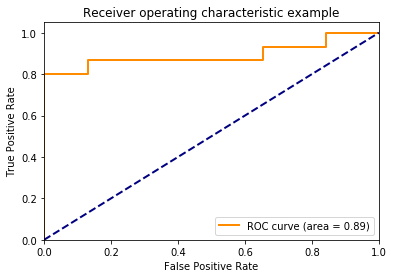

In [113]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)